<h1><center>Coupon Purchase Prediction</center></h1>

<img src='img/coupon.png'>

---

## Contents

- EDA
- Feature Select
- Modeling
- Evaluation

In [1]:
# Setting
from function import * # import function
train = pd.read_csv('data/train.csv') # import train data
test = pd.read_csv('data/test.csv') # import test data

---

# 1. EDA

### 1.1 Overall information

In [2]:
# check shape
print('train shape :', train.shape)
print('test shape :', test.shape)

train shape : (2517206, 36)
test shape : (7090630, 35)


### 1.2 Y data

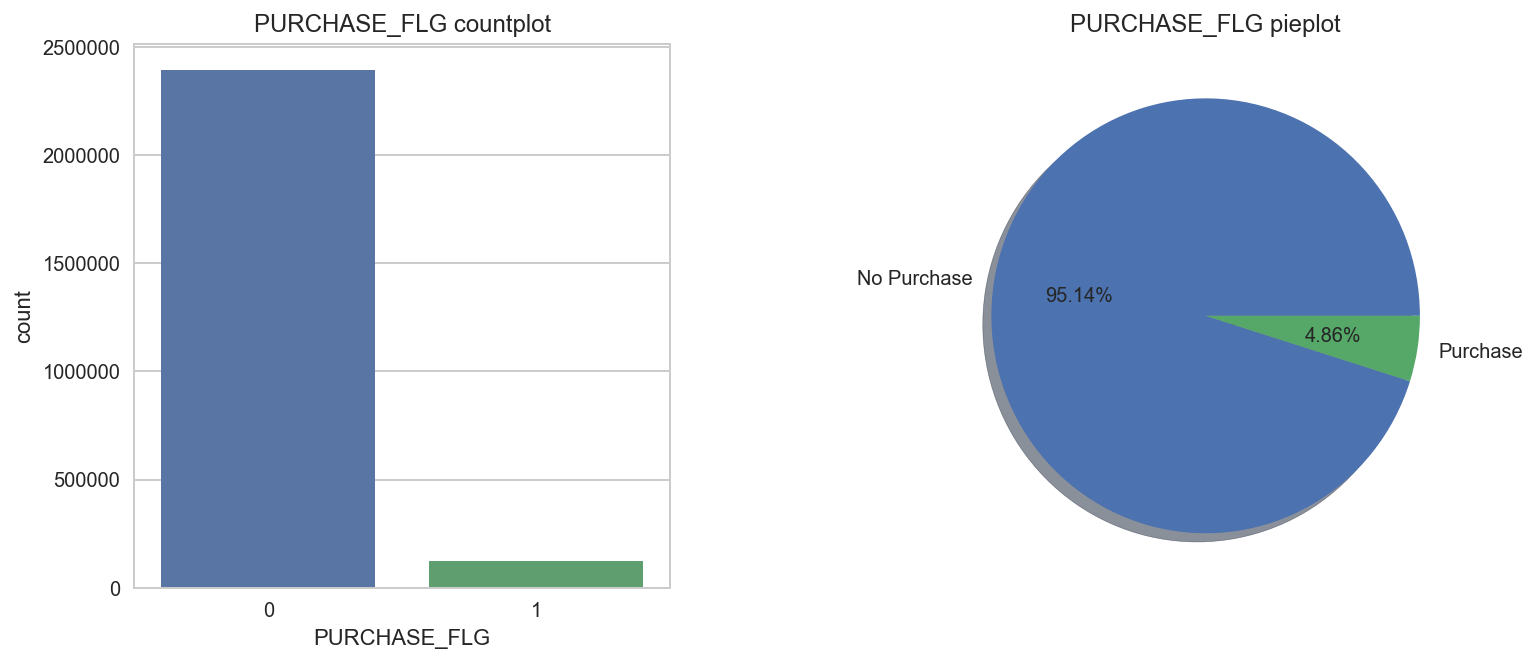

In [3]:
# y_data
plt.figure(figsize=(12, 5))
subplots_adjust(wspace = 0.5)
df = pd.DataFrame([len(train[train['PURCHASE_FLG'] == 0])/len(train), 
                   len(train[train['PURCHASE_FLG'] == 1])/len(train)], 
                   index=['No Purchase', 'Purchase'], columns=['x'])

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x = 'PURCHASE_FLG', data = train)
plt.title('PURCHASE_FLG countplot')
labels = 'No Purchase', 'Purchase'

# pieplot
plt.subplot(1, 2, 2)
plt.pie(df, labels = labels, autopct='%1.2f%%', shadow = True, explode = (0.0, 0.0))
plt.title('PURCHASE_FLG pieplot')

plt.show()

### 1.3 Y data & X data

#### 1.3.1 Genre

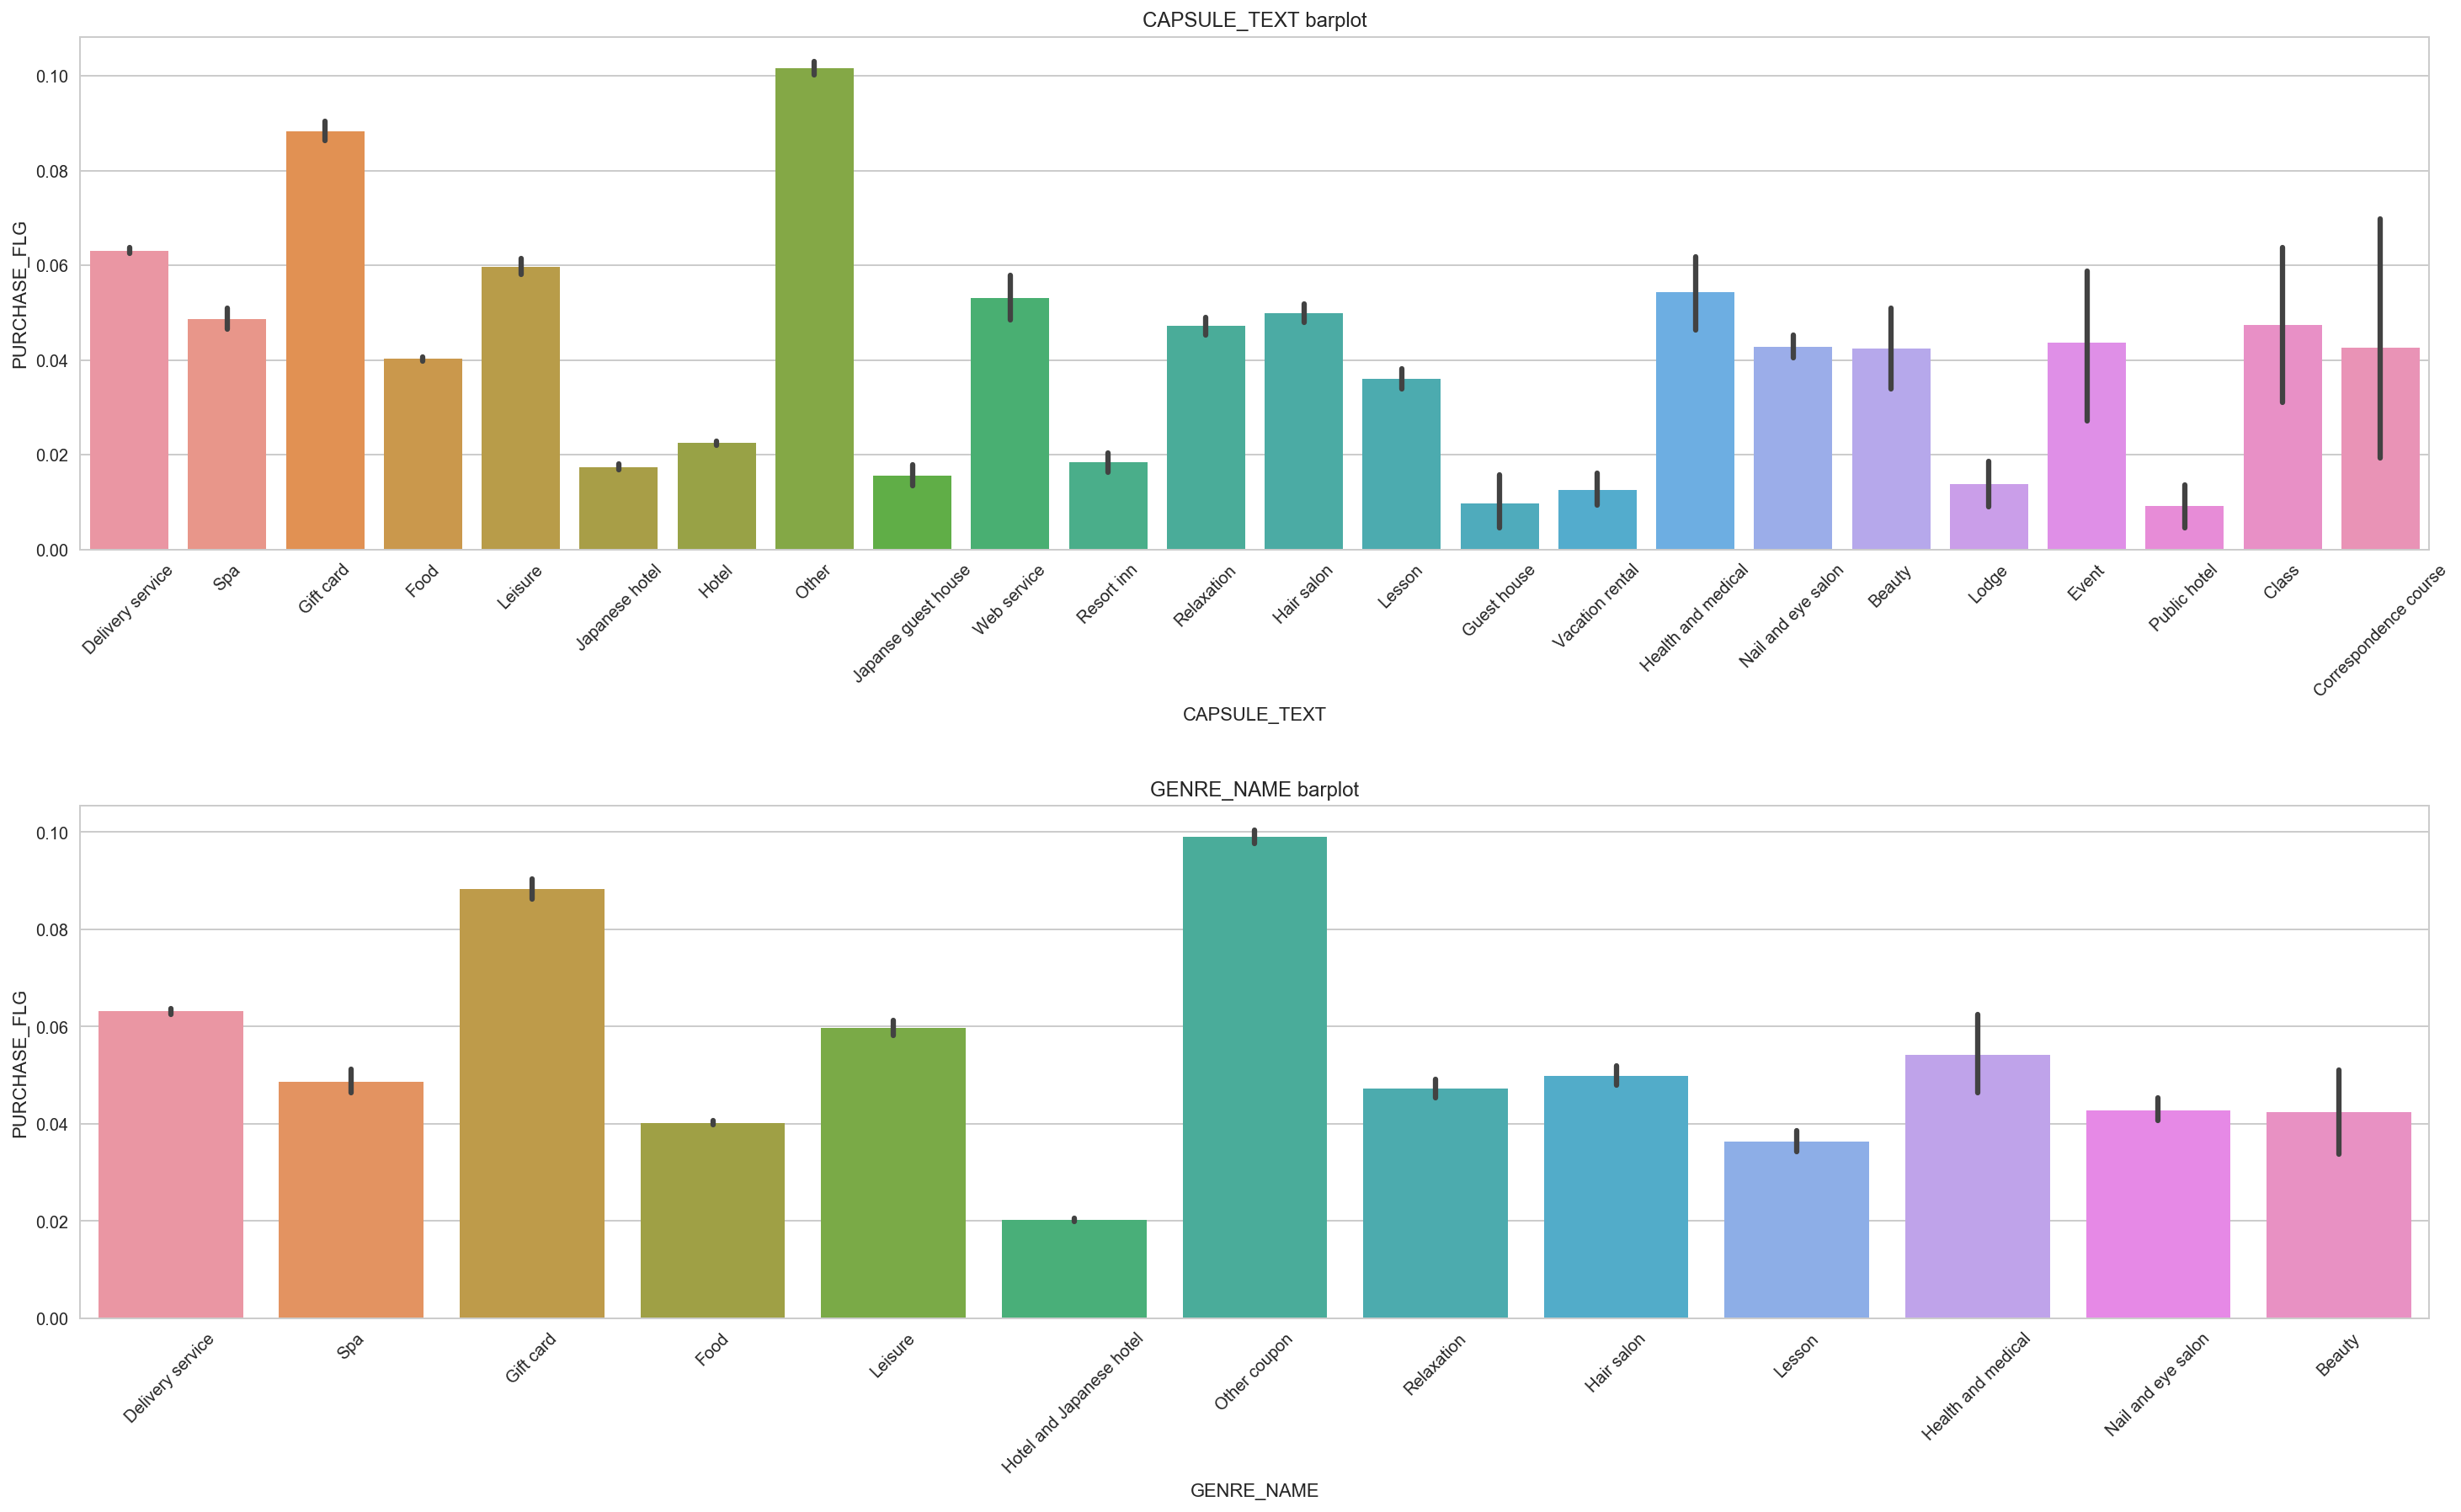

In [4]:
# Gengre barplot
plt.figure(figsize=(25, 14))
subplots_adjust(hspace = 0.5)

# CAPSULE_TEXT
plt.subplot(2, 1, 1)
sns.barplot(x = 'CAPSULE_TEXT', y = 'PURCHASE_FLG', data = train)
plt.title('CAPSULE_TEXT barplot')
plt.xticks(rotation='45')

# GENRE_NAME
plt.subplot(2, 1, 2)
sns.barplot(x = 'GENRE_NAME', y = 'PURCHASE_FLG', data = train)
plt.title('GENRE_NAME barplot')
plt.xticks(rotation='45')

plt.show()

#### 1.3.2 Category

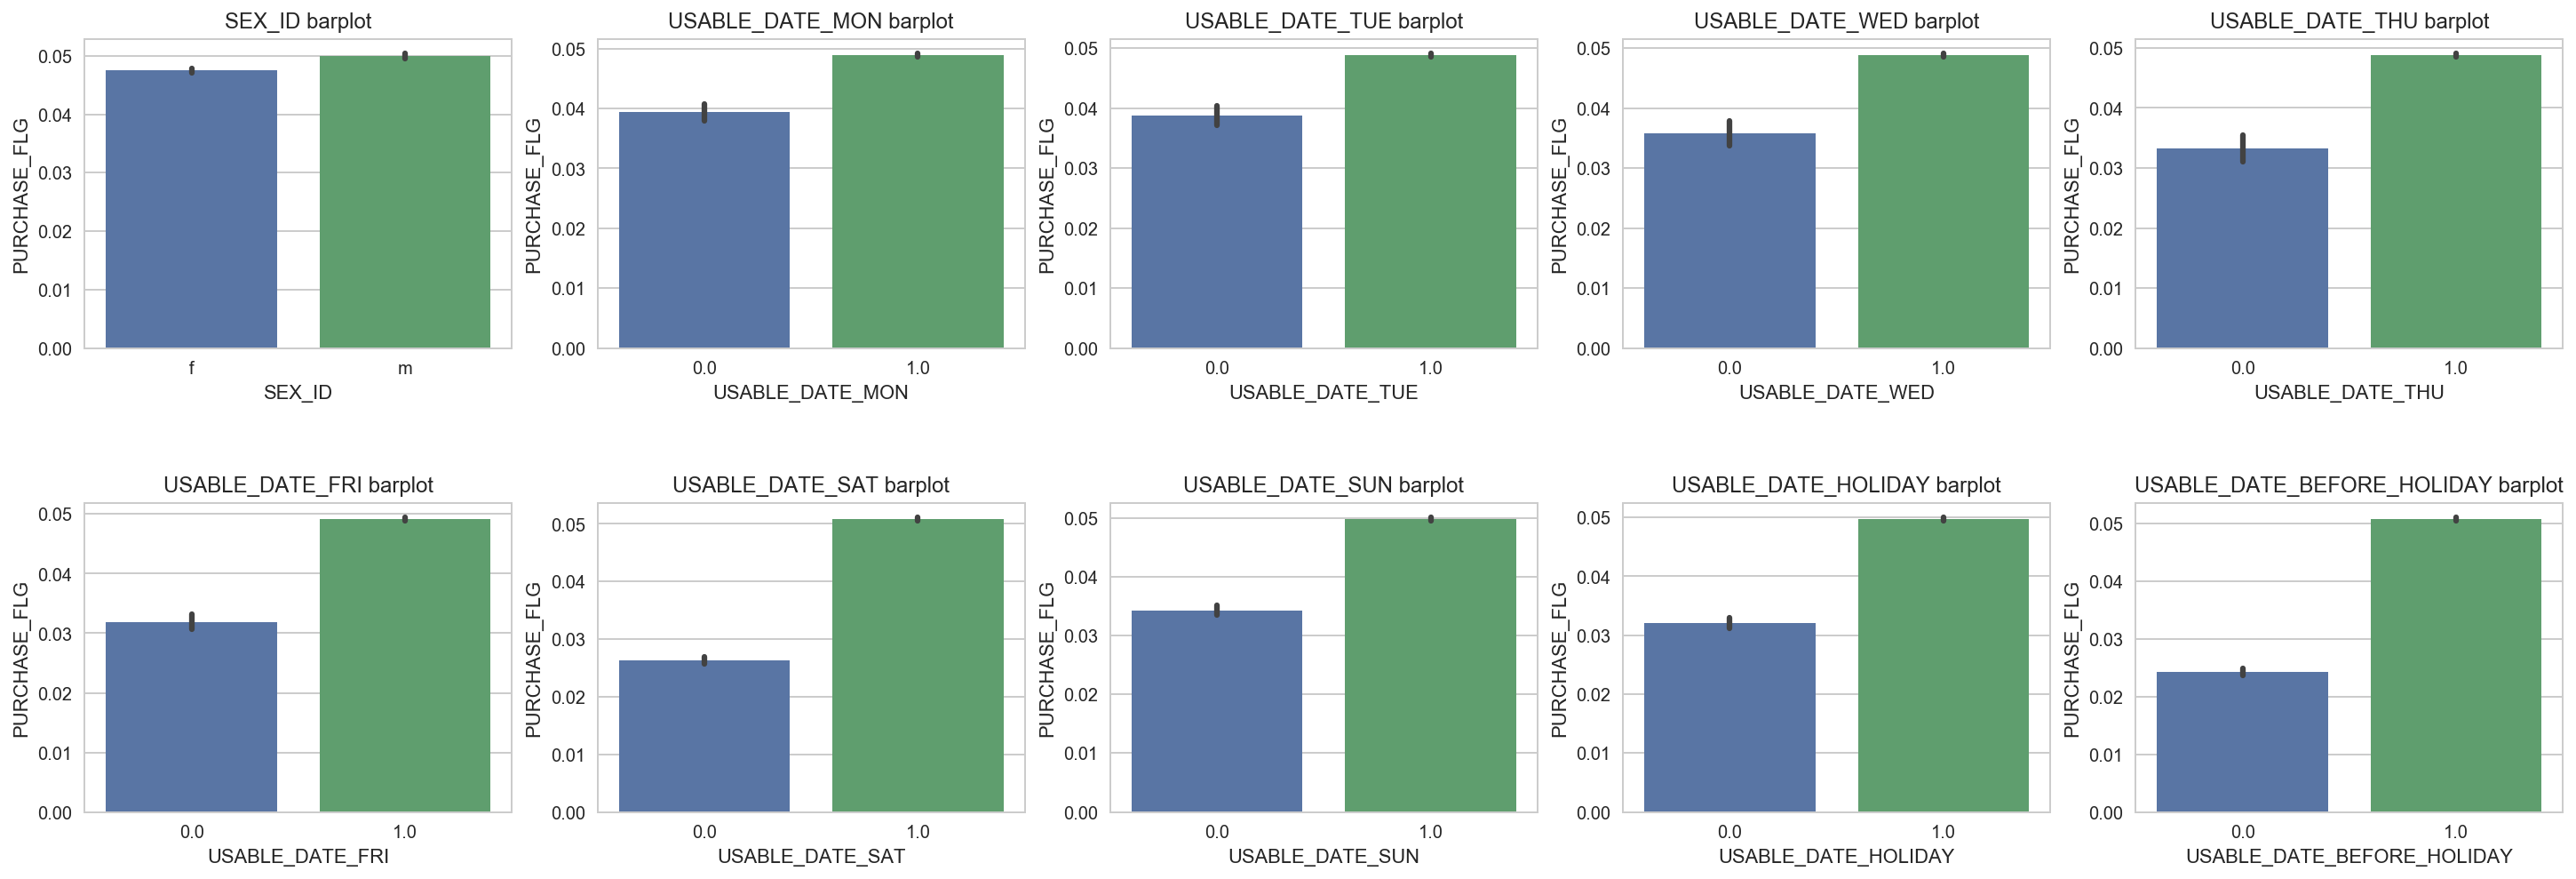

In [5]:
# category barplot
plt.figure(figsize=(25, 8))
subplots_adjust(hspace = 0.5)

for i in range(4, 13+1):
    plt.subplot(2, 5, i-3)
    sns.barplot(x = train[train.columns[i]], y = train['PURCHASE_FLG'])
    plt.title('{} barplot'.format(train.columns[i]))

#### 1.3.3 Location

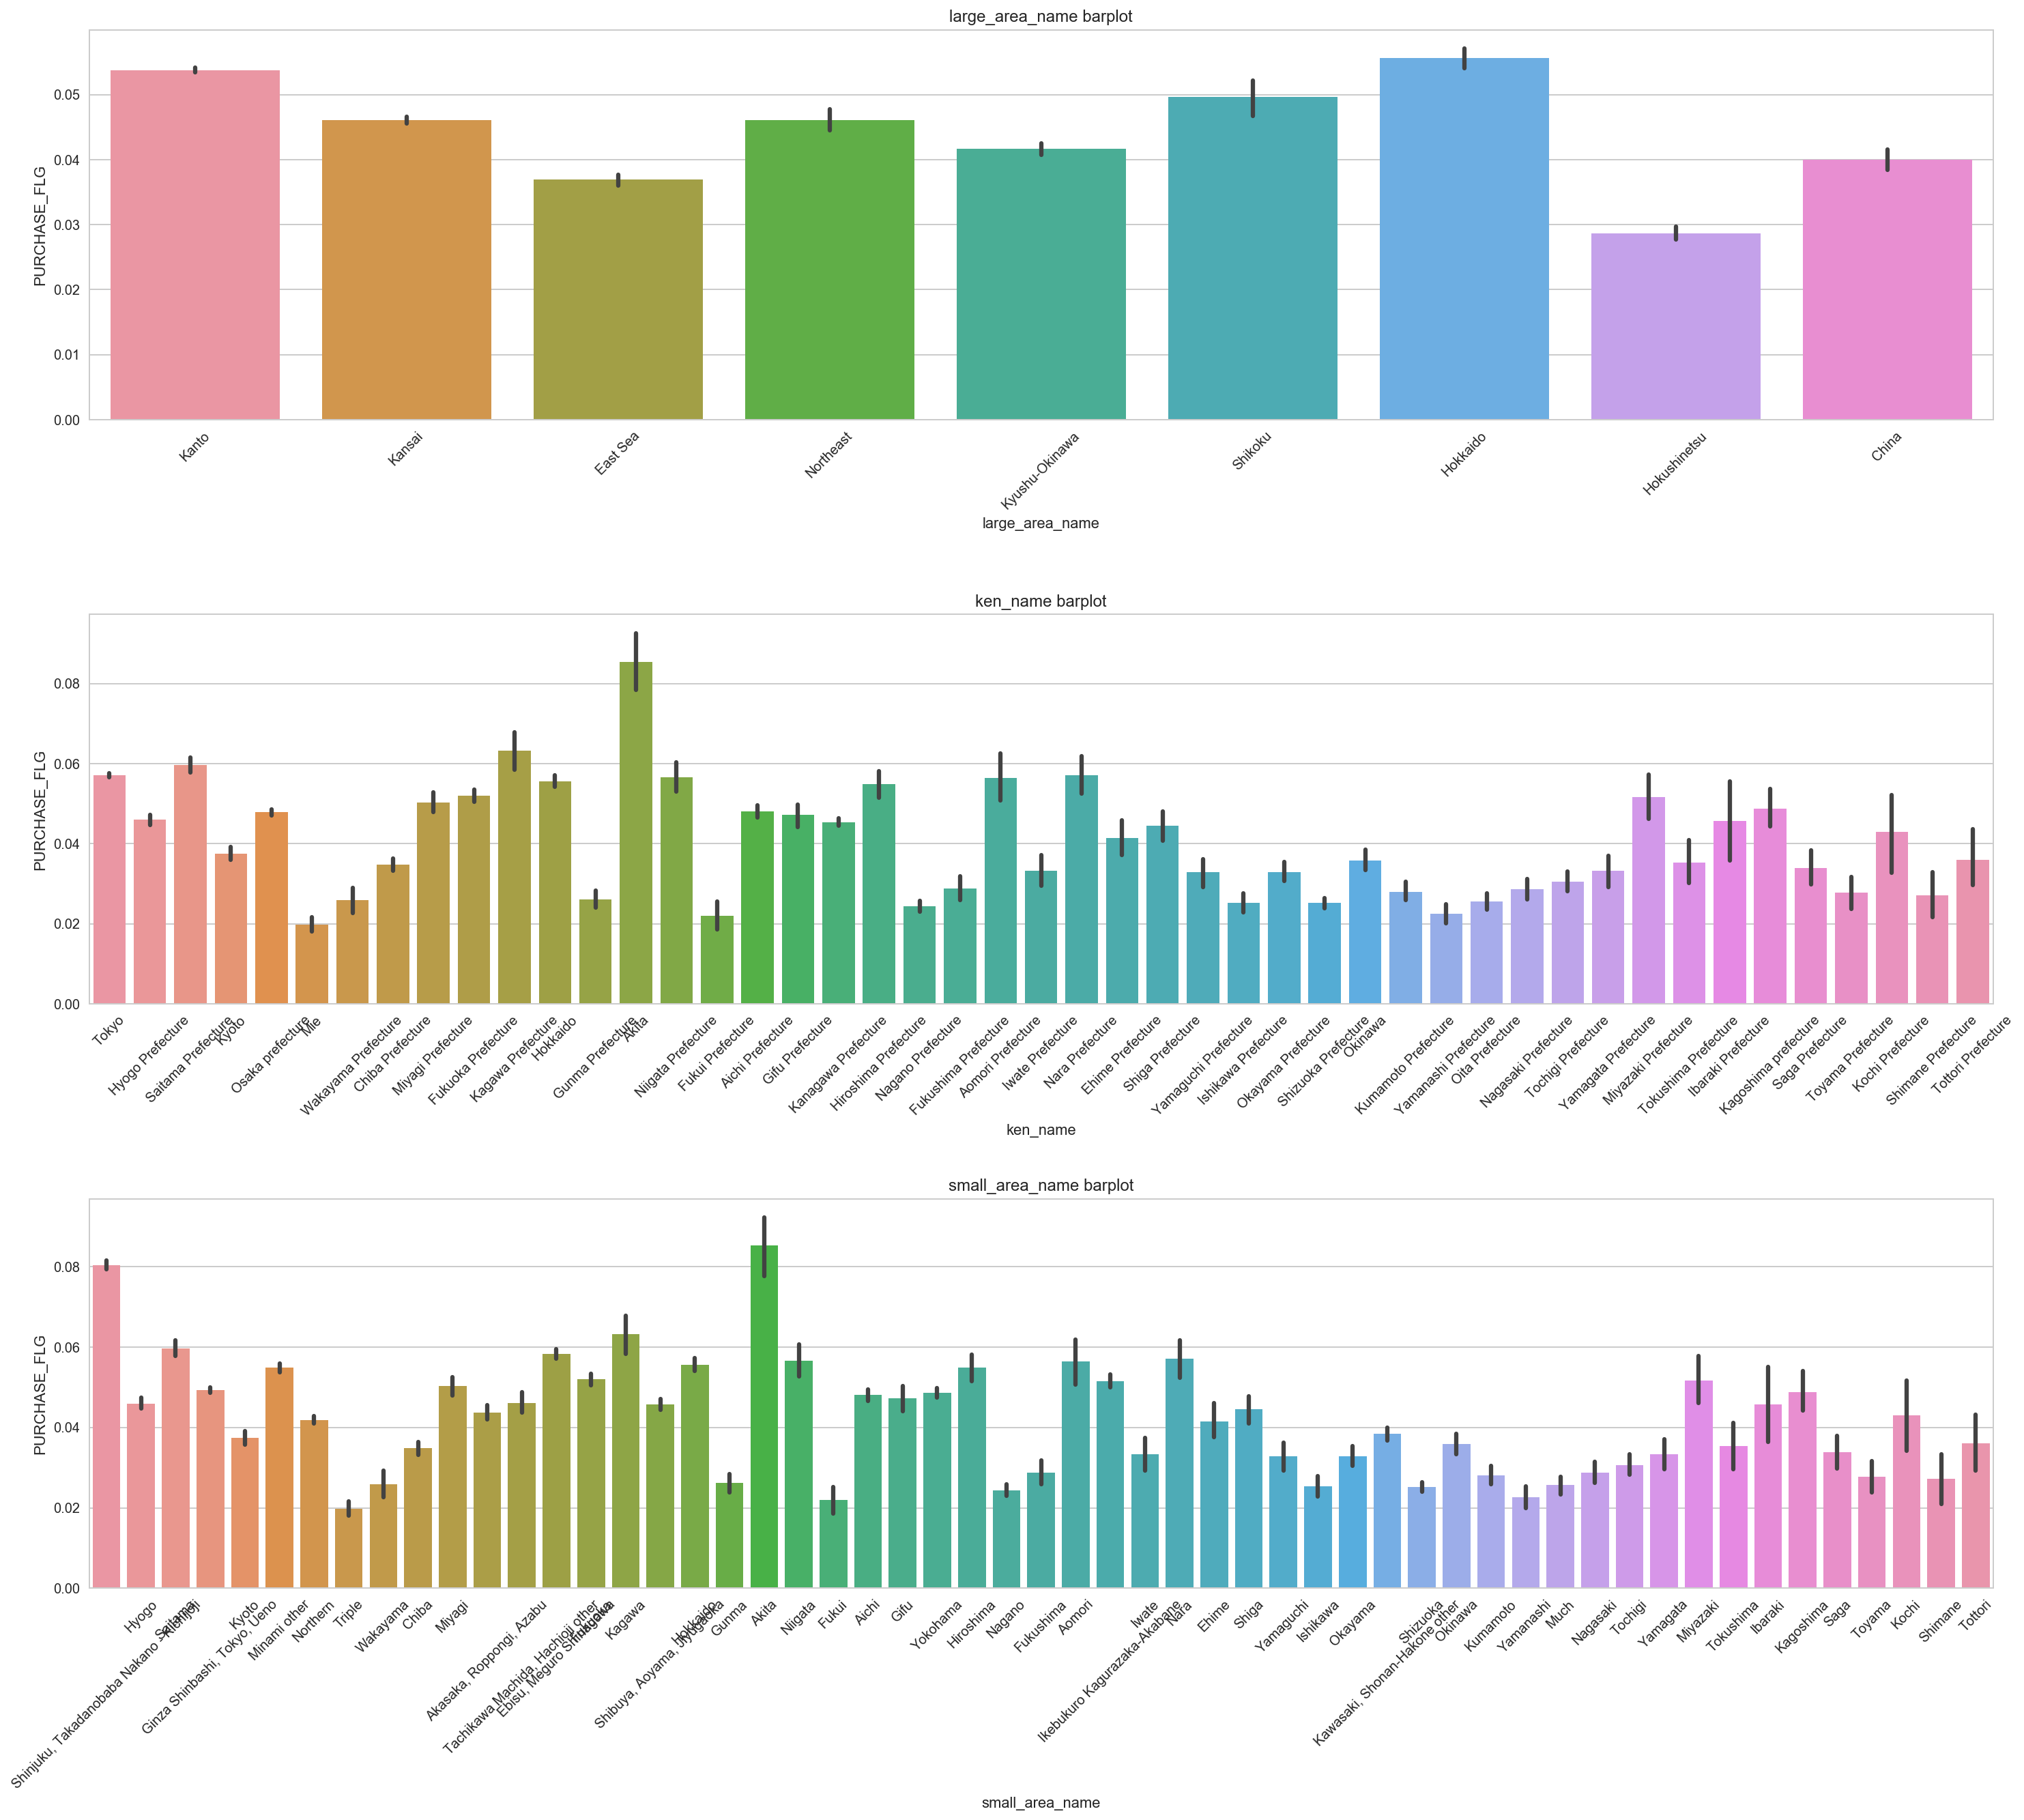

In [6]:
# Location barplot
plt.figure(figsize=(25, 21))
subplots_adjust(hspace = 0.5)

# large_area_name
plt.subplot(3, 1, 1)
sns.barplot(x = 'large_area_name', y = 'PURCHASE_FLG', data = train)
plt.title('large_area_name barplot')
plt.xticks(rotation='45')

# ken_name
plt.subplot(3, 1, 2)
sns.barplot(x = 'ken_name', y = 'PURCHASE_FLG', data = train)
plt.title('ken_name barplot')
plt.xticks(rotation='45')

# small_area_name
plt.subplot(3, 1, 3)
sns.barplot(x = 'small_area_name', y = 'PURCHASE_FLG', data = train)
plt.title('small_area_name barplot')
plt.xticks(rotation='45')

plt.show()

#### 1.3.4 Date

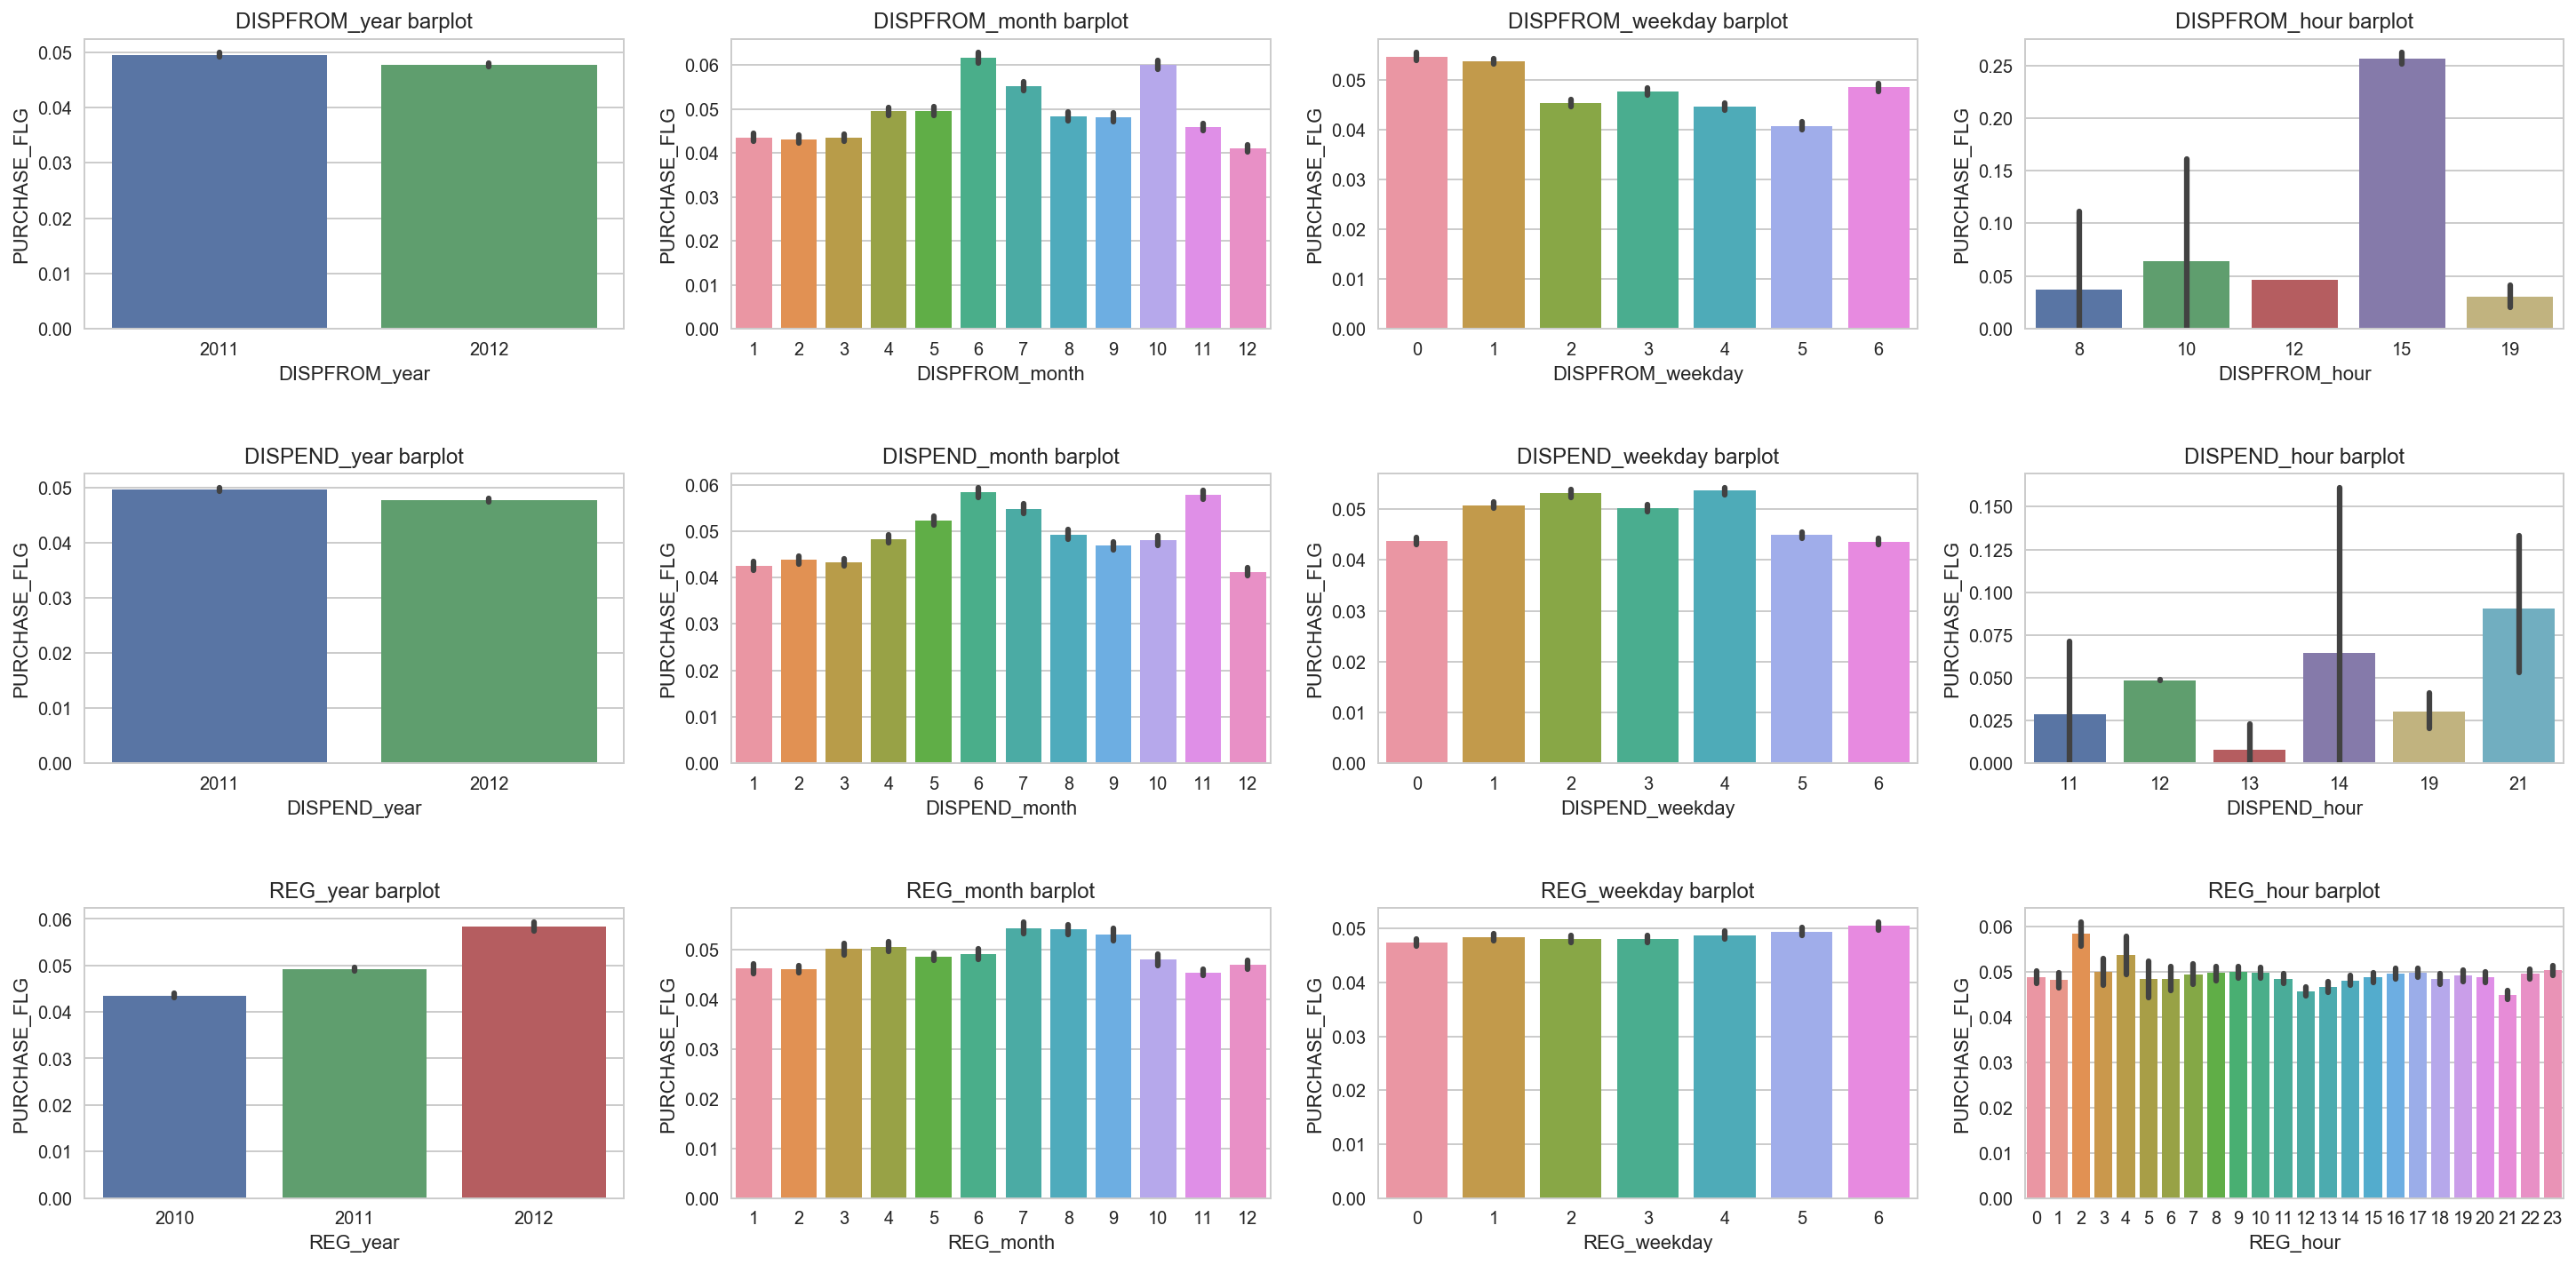

In [7]:
# feature boxplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(17, 28+1) :
    plt.subplot(3, 4, i-16)
    sns.barplot(x = train[train.columns[i]], y = train['PURCHASE_FLG'])
    plt.title('{} barplot'.format(train.columns[i]))

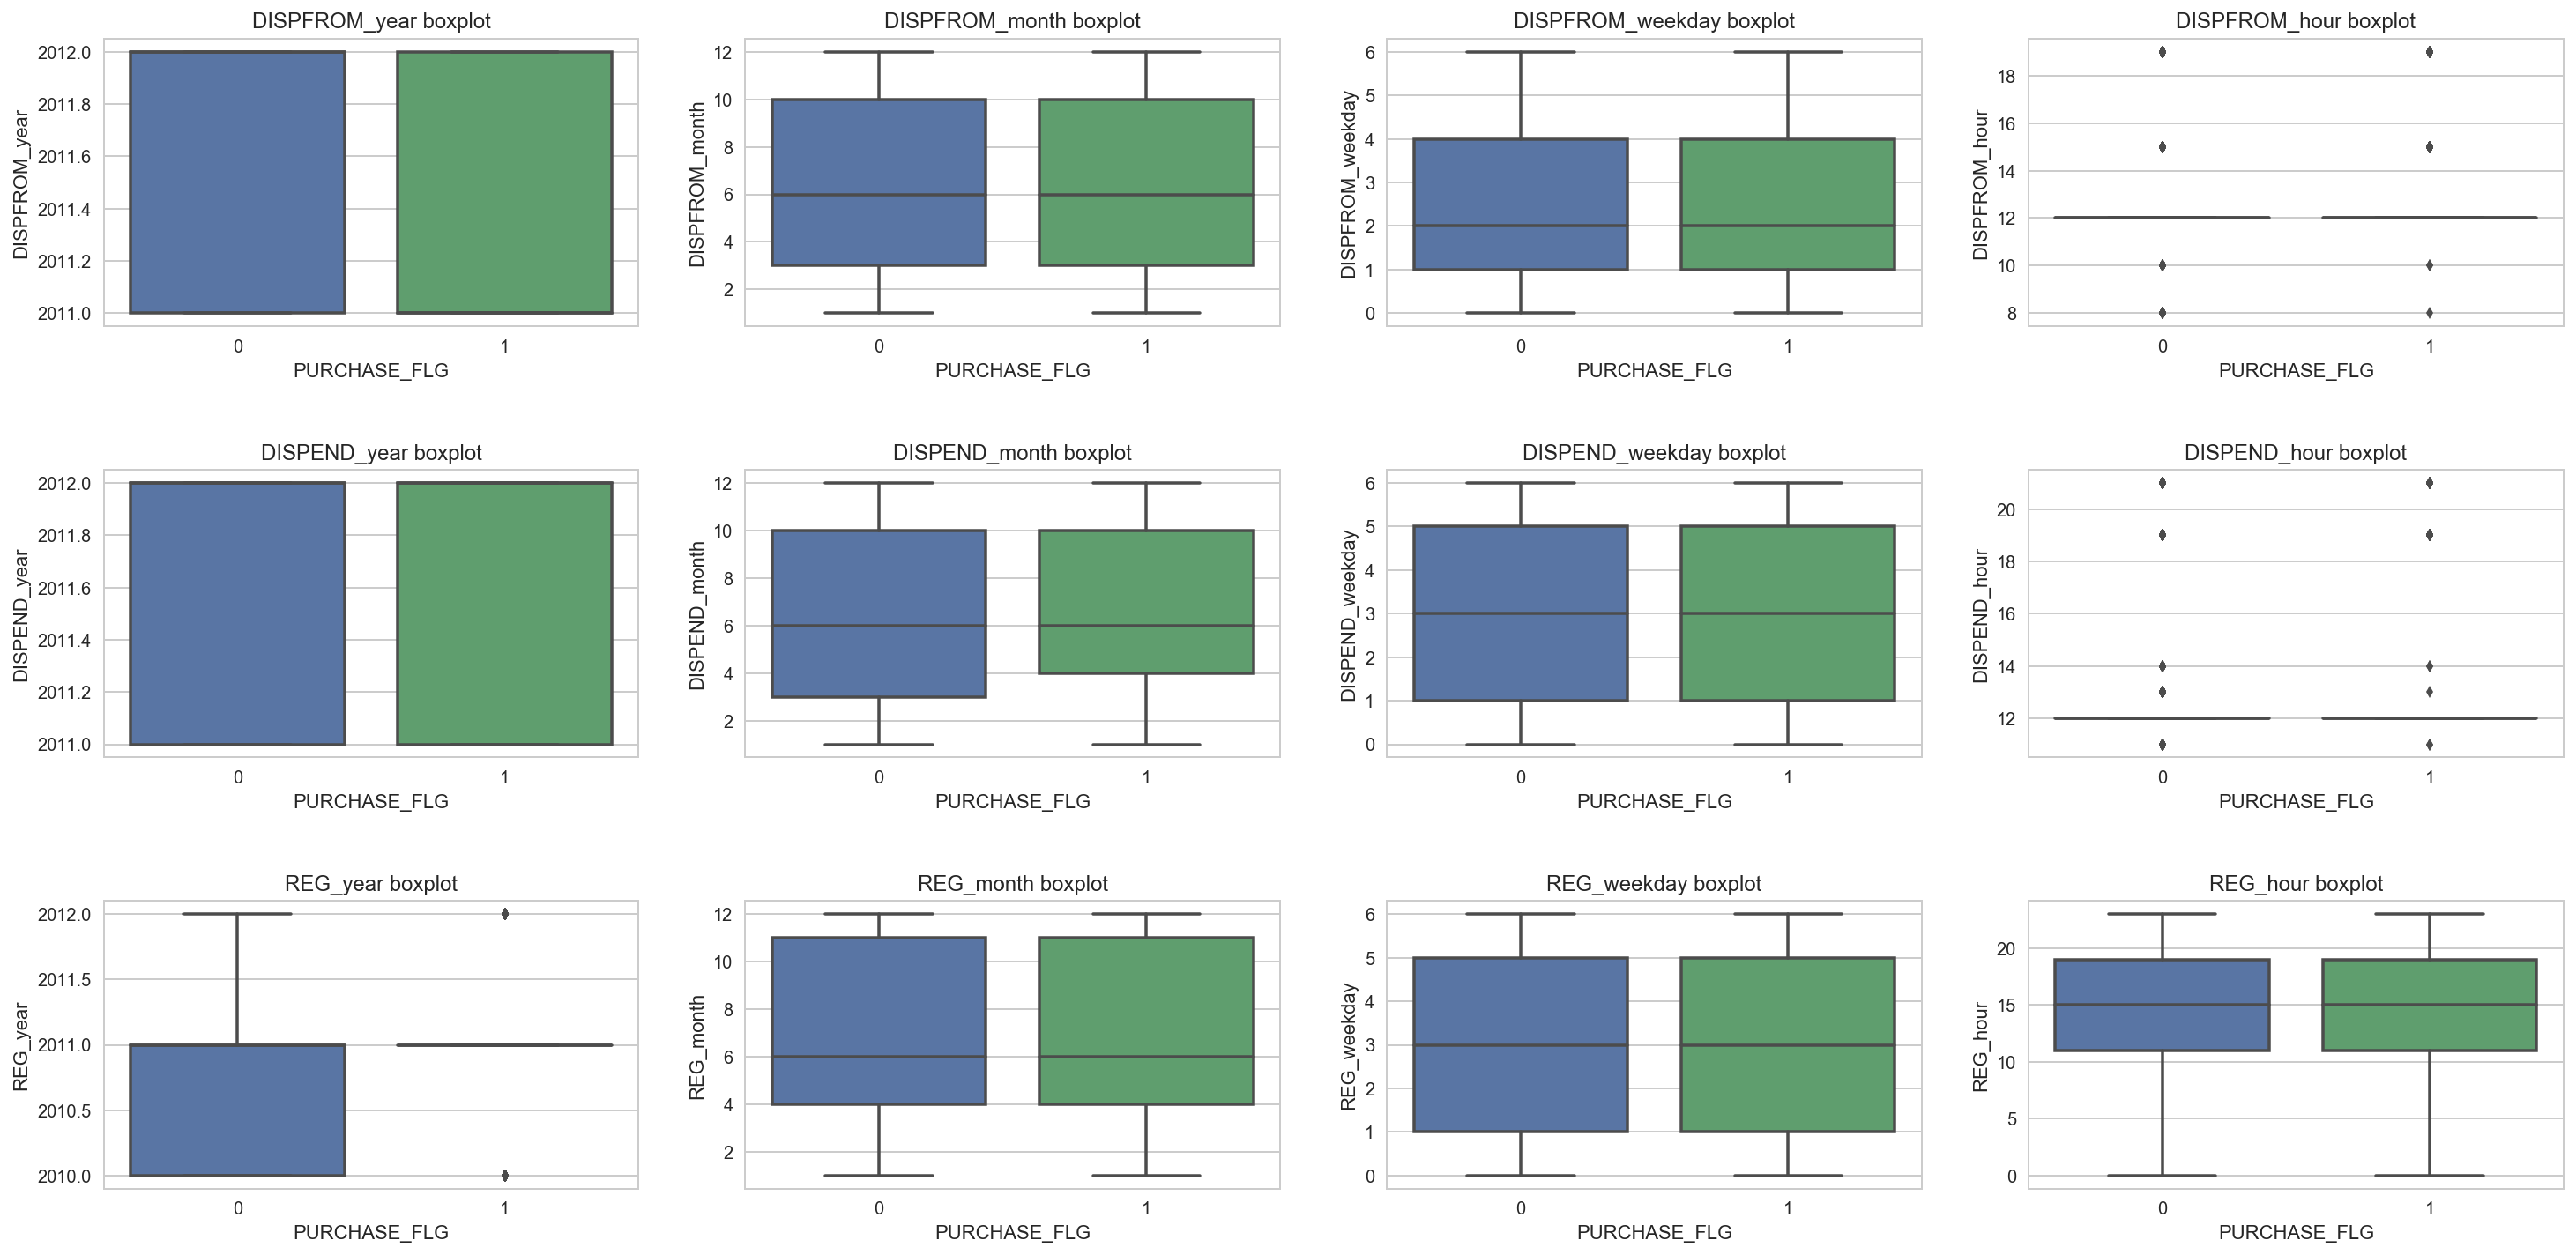

In [8]:
# detail boxplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(17, 28+1) :
    plt.subplot(3, 4, i-16)
    sns.boxplot(x = train['PURCHASE_FLG'], y = train[train.columns[i]], data = train)
    plt.title('{} boxplot'.format(train.columns[i]))

#### 1.3.5 Continuos

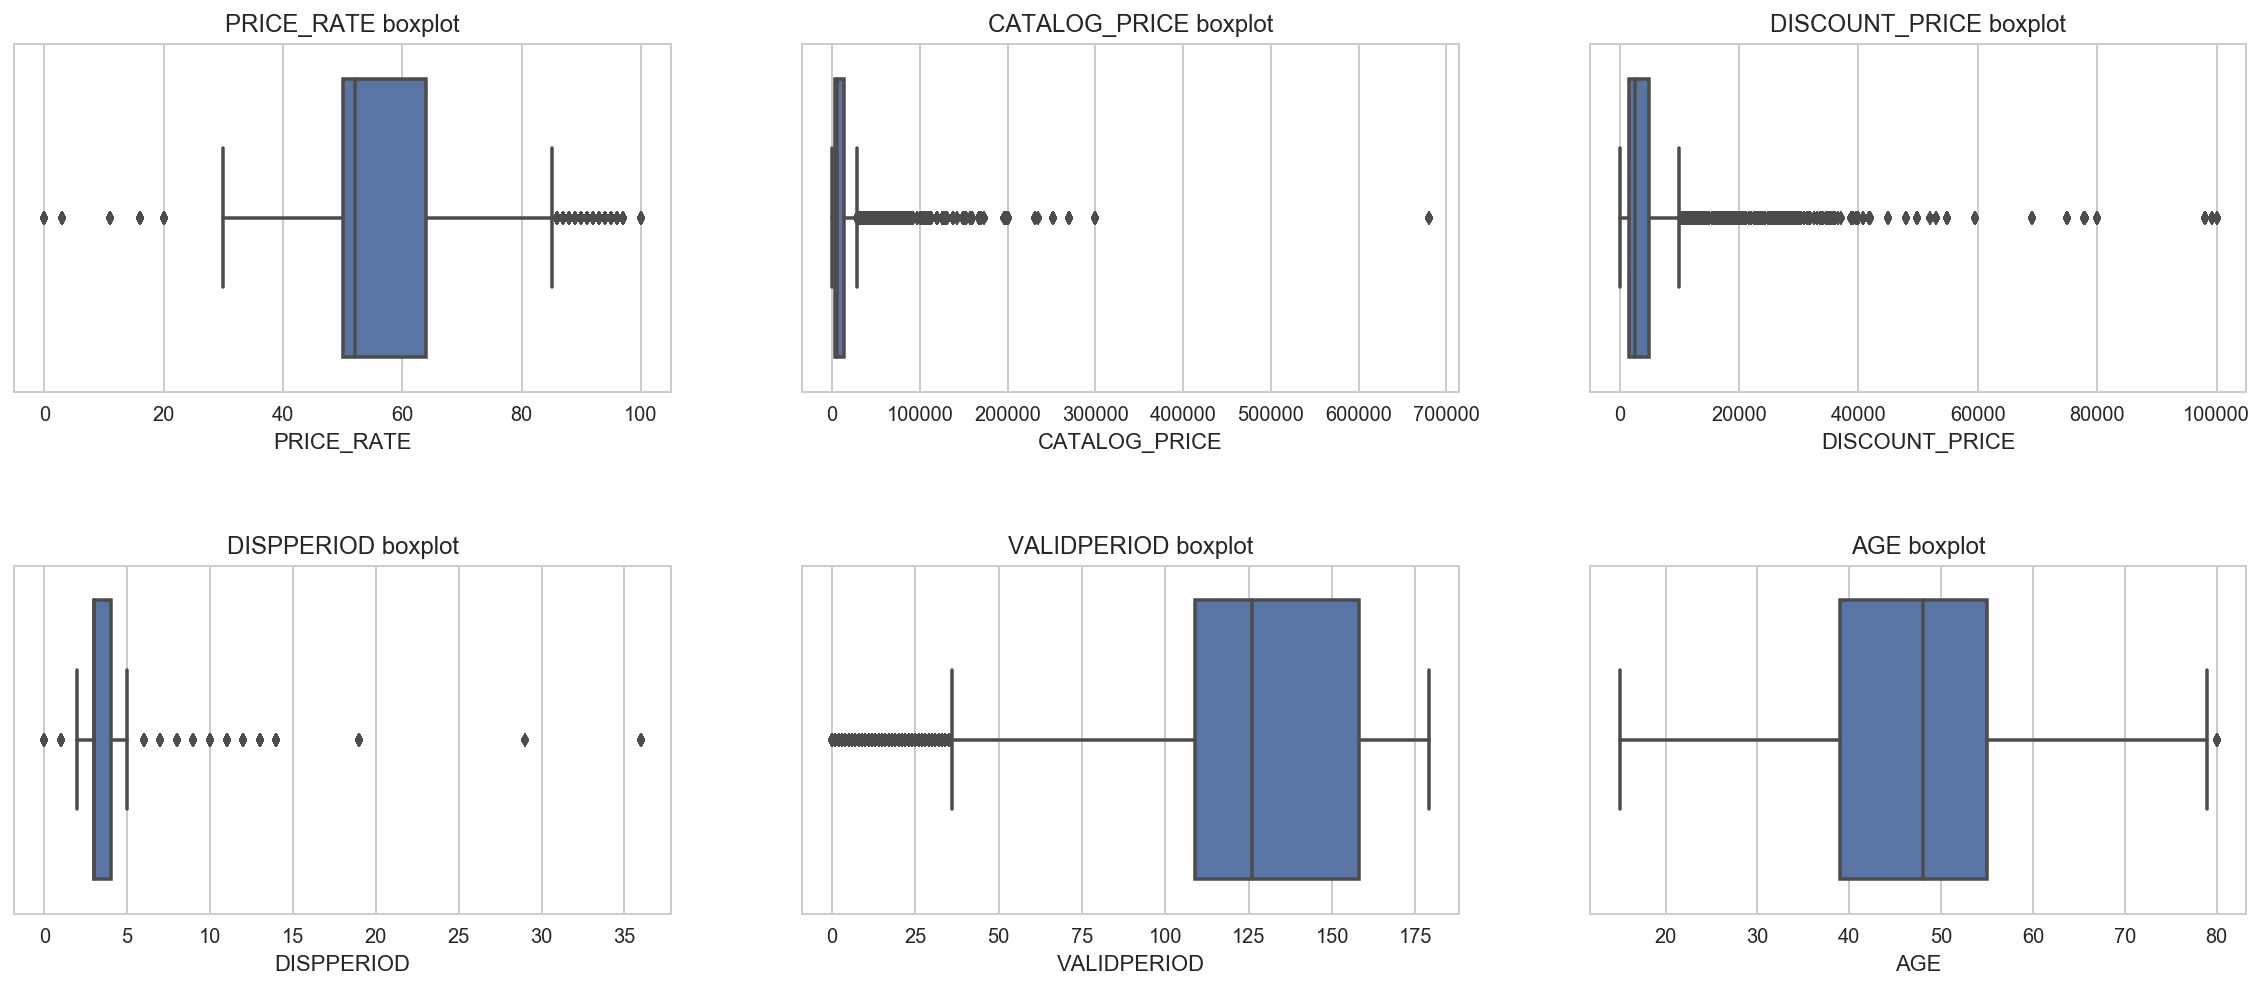

In [9]:
# feature boxplot
plt.figure(figsize=(20, 8))
subplots_adjust(hspace = 0.5)

for i in range(29, 34+1):
    plt.subplot(2, 3, i-28)
    sns.boxplot(x = train[train.columns[i]])
    plt.title('{} boxplot'.format(train.columns[i]))

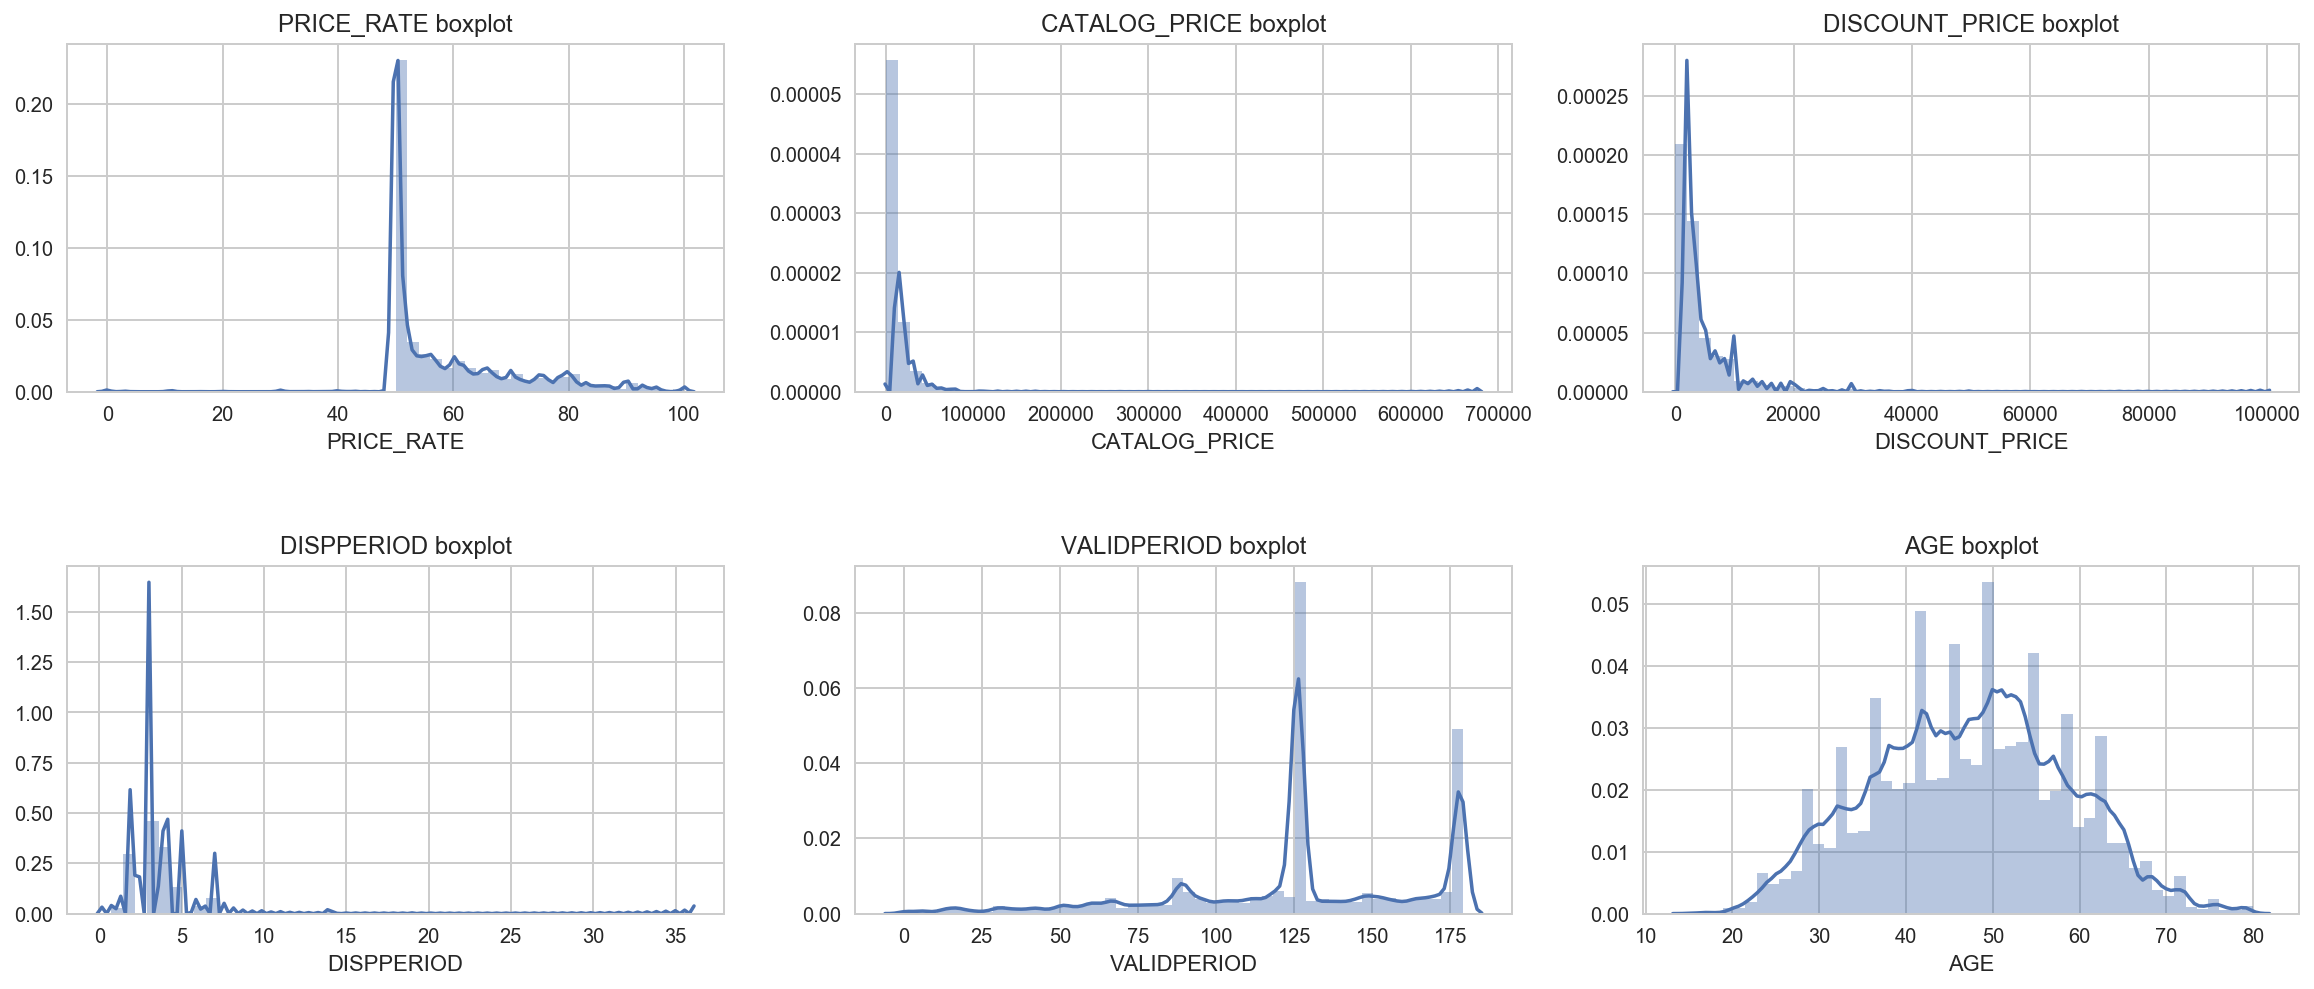

In [10]:
# feature distplot
plt.figure(figsize=(20, 8))
subplots_adjust(hspace = 0.5)

for i in range(29, 34+1):
    plt.subplot(2, 3, i-28)
    sns.distplot(train[train.columns[i]].values, axlabel = train.columns[i])
    plt.title('{} boxplot'.format(train.columns[i]))

### 1.4 Correlation

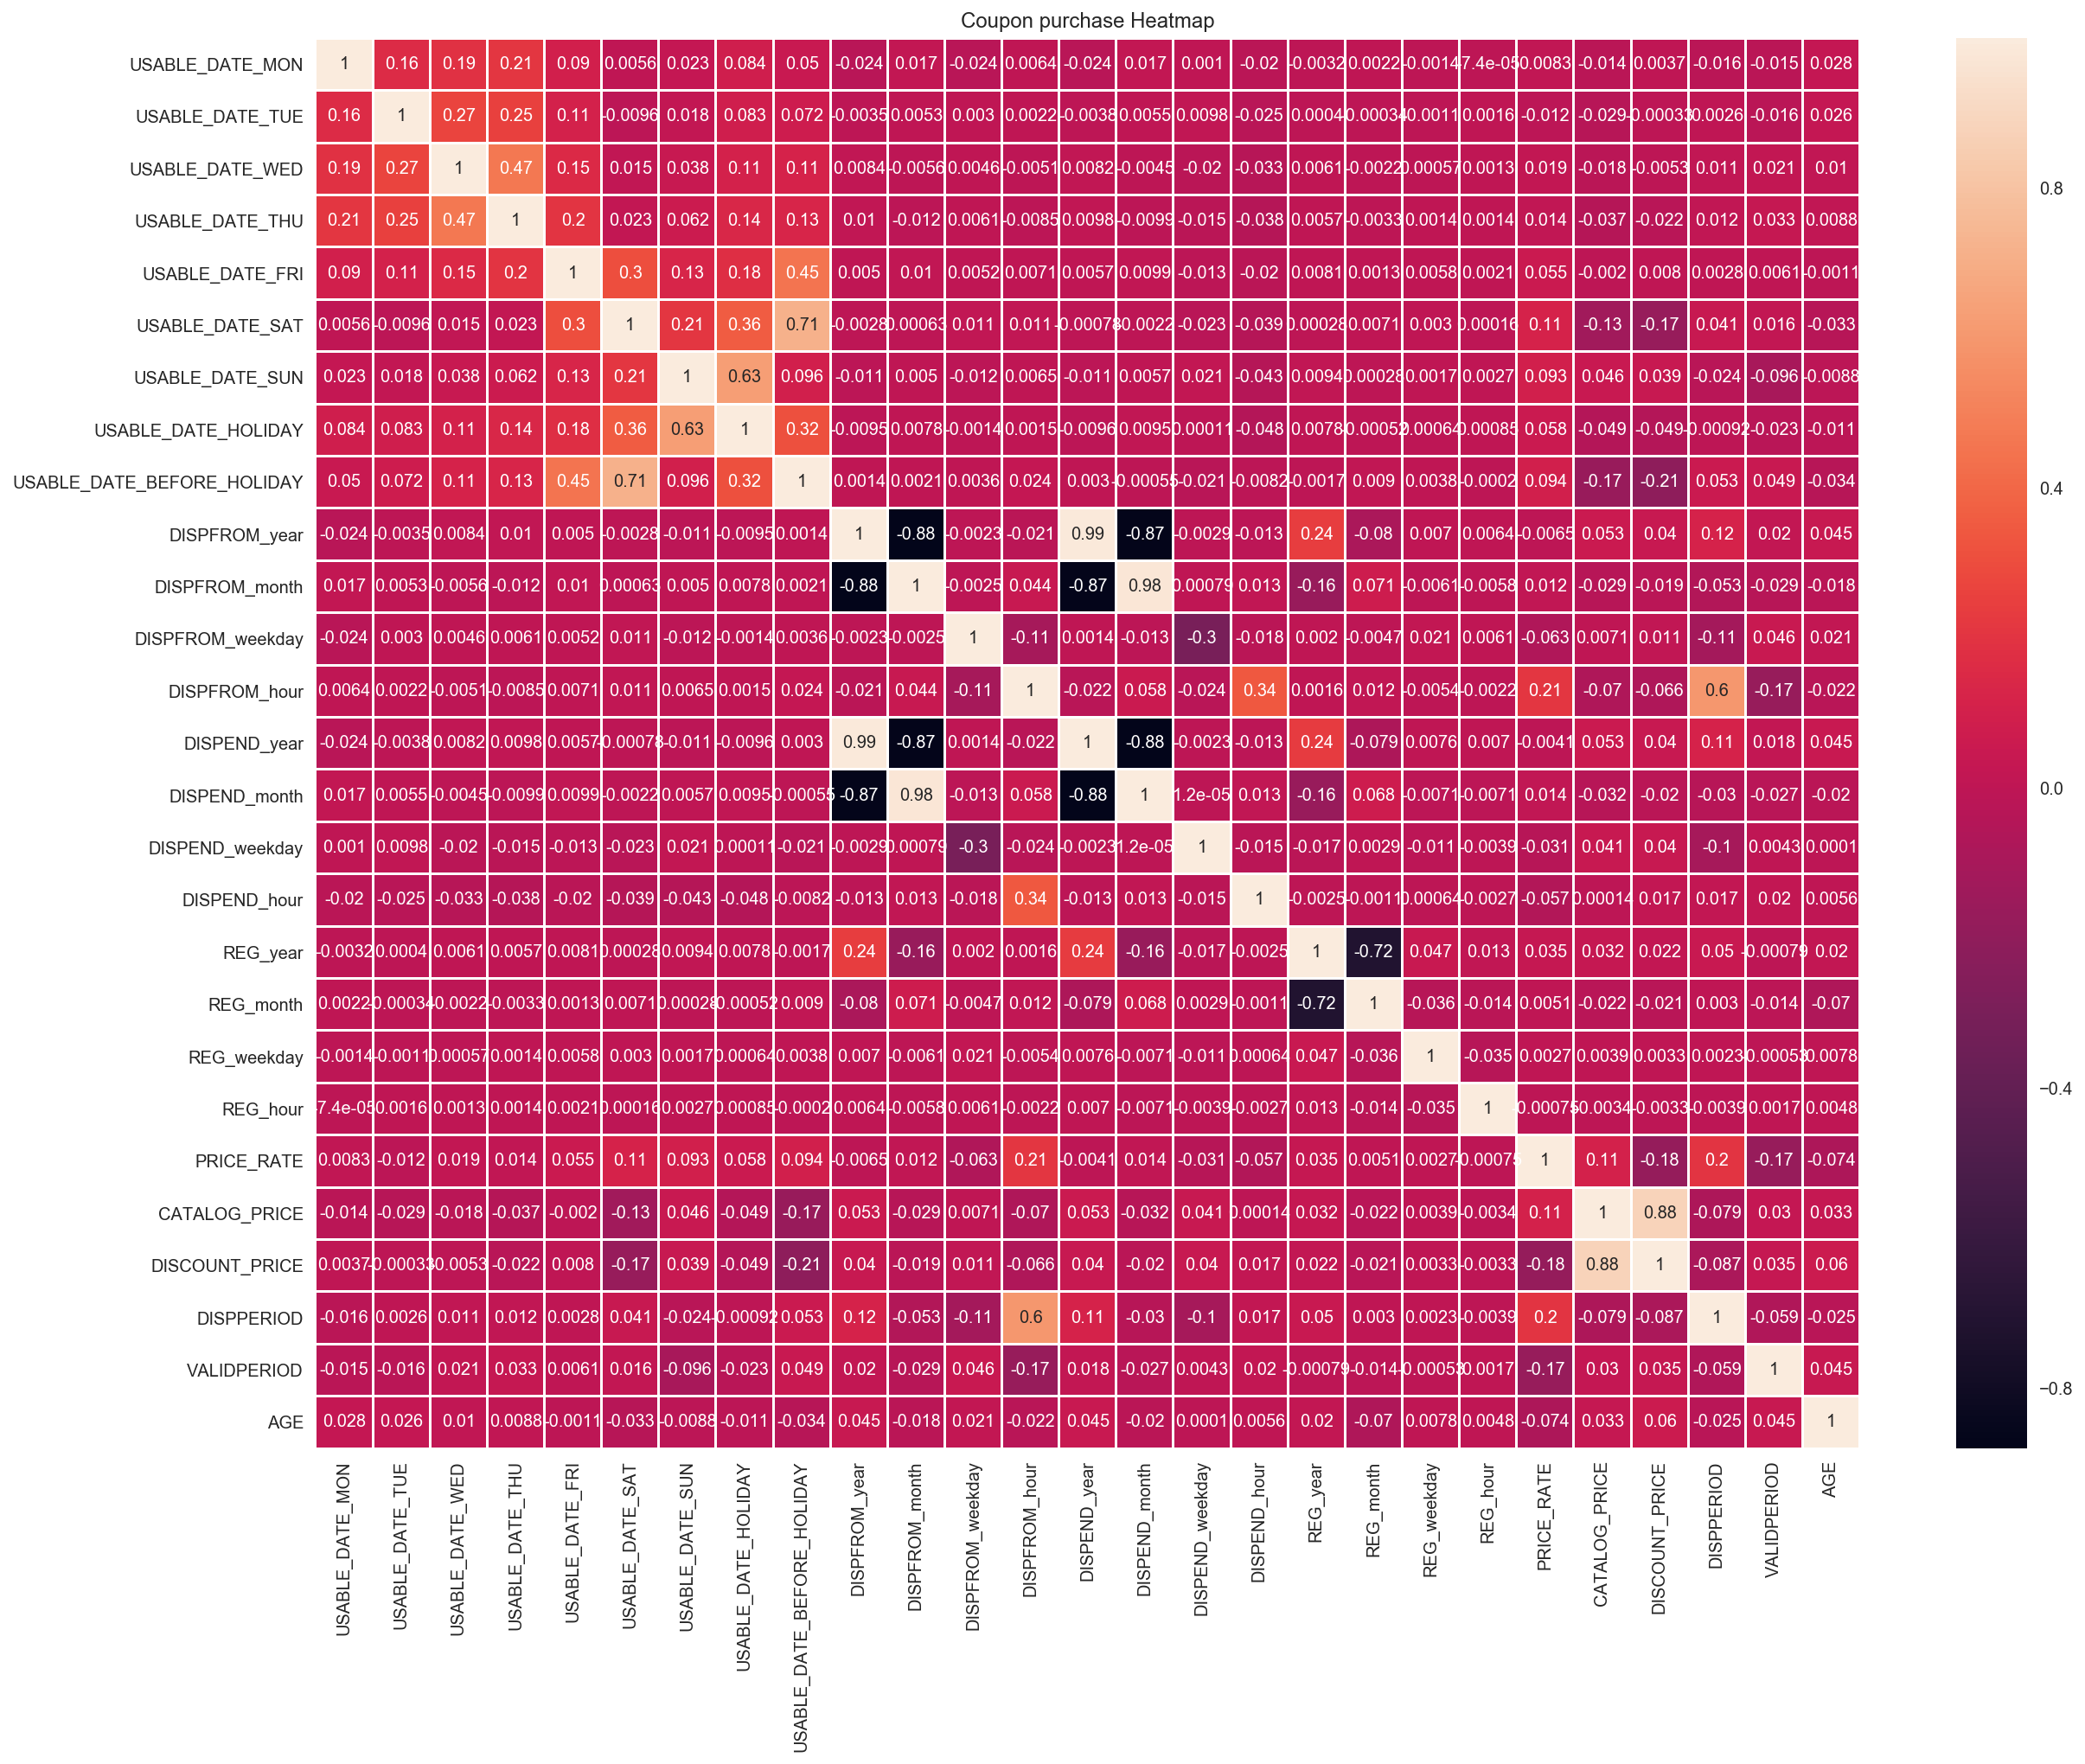

In [11]:
# correlation
correlation = train.drop(['USER_ID_hash', 'COUPON_ID_hash', 'CAPSULE_TEXT', 'GENRE_NAME', 'PURCHASE_FLG'], axis = 1)

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('Coupon purchase Heatmap')
plt.show()

---

# 2. Feature select

### 2.1 Check VIF

In [12]:
# Make Lebel Encoder
ls = ['CAPSULE_TEXT', 'GENRE_NAME', 'SEX_ID', 'large_area_name', 'ken_name', 'small_area_name']

for i in range(len(ls)):
    le = LabelEncoder()
    le.fit(train[ls[i]])
    col = le.transform(train[ls[i]])
    train[ls[i]] = col

In [13]:
# Make Lebel Encoder
ls = ['CAPSULE_TEXT', 'GENRE_NAME', 'SEX_ID', 'large_area_name', 'ken_name', 'small_area_name']

for i in range(len(ls)):
    le = LabelEncoder()
    le.fit(test[ls[i]])
    col = le.transform(test[ls[i]])
    test[ls[i]] = col

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_vif = train.drop(['USER_ID_hash', 'COUPON_ID_hash', 'PURCHASE_FLG'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif["features"] = train_vif.columns
vif

,VIF Factor,features
0,7.603343e+01,CAPSULE_TEXT
1,5.991143e+01,GENRE_NAME
2,1.920396e+00,SEX_ID
3,3.806329e+01,USABLE_DATE_MON
4,5.347335e+01,USABLE_DATE_TUE
5,1.057954e+02,USABLE_DATE_WED
6,1.367520e+02,USABLE_DATE_THU
7,4.510812e+01,USABLE_DATE_FRI
8,2.508113e+01,USABLE_DATE_SAT
9,2.329885e+01,USABLE_DATE_SUN


### 2.2 Feature select

In [15]:
train = train.drop(['GENRE_NAME', 'USABLE_DATE_MON', 'USABLE_DATE_TUE', 'USABLE_DATE_WED', 'USABLE_DATE_THU', 
                    'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'DISPFROM_year', 'DISPFROM_month', 
                    'DISPFROM_hour', 'DISPEND_year', 'DISPEND_month', 'DISPEND_hour', 'REG_year',
                    'USABLE_DATE_BEFORE_HOLIDAY', 'PRICE_RATE'], axis = 1)

In [16]:
test = test.drop(['GENRE_NAME', 'USABLE_DATE_MON', 'USABLE_DATE_TUE', 'USABLE_DATE_WED', 'USABLE_DATE_THU', 
                  'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'DISPFROM_year', 'DISPFROM_month', 
                  'DISPFROM_hour', 'DISPEND_year', 'DISPEND_month', 'DISPEND_hour', 'REG_year',
                  'USABLE_DATE_BEFORE_HOLIDAY', 'PRICE_RATE'], axis = 1)

In [17]:
train_vif = train.drop(['USER_ID_hash', 'COUPON_ID_hash', 'PURCHASE_FLG'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif["features"] = train_vif.columns
vif

,VIF Factor,features
0,3.624585,CAPSULE_TEXT
1,1.910976,SEX_ID
2,12.768617,USABLE_DATE_HOLIDAY
3,9.300717,large_area_name
4,6.564098,ken_name
5,3.891159,small_area_name
6,3.176721,DISPFROM_weekday
7,3.524970,DISPEND_weekday
8,4.245931,REG_month
9,3.165578,REG_weekday


---

# 3. Modeling

### 3.1 Make data

In [18]:
# Select columns
category = ['CAPSULE_TEXT', 'SEX_ID', 'USABLE_DATE_HOLIDAY', 'large_area_name', 
            'ken_name', 'small_area_name', 'DISPFROM_weekday', 'DISPEND_weekday', 'REG_month', 
            'REG_weekday', 'REG_hour']
continuous = ['CATALOG_PRICE', 'DISCOUNT_PRICE', 'DISPPERIOD', 'VALIDPERIOD', 'AGE']

In [19]:
# make train/test data

train_cols, test_cols = [], []

# category
for cat in category:
    train_tok, test_tok = category_to_ohe(train[cat],test[cat])
    train_cols.append(train_tok)
    test_cols.append(test_tok)    

# continuous
for con in continuous:
    train_cols.append(train[con].values.reshape(len(train),1))
    test_cols.append(test[con].values.reshape(len(test),1))

In [20]:
# stack train/test data
X_train = np.hstack(tuple(each for each in train_cols))
X_test = np.hstack(tuple(each for each in test_cols))
y_train = train['PURCHASE_FLG']

### 3.2 RandomForest

In [ ]:
# 랜덤포레스트 (RandomForest) (score : 0.002595), 794등
clf = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_split = 10, criterion = 'entropy')
model = clf.fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# Top 10 Coupon
pos_idx = np.where(model.classes_ == True)[0][0]
test['predict'] = predict_proba[:, pos_idx]
top10_coupon = test.groupby('USER_ID_hash').apply(top_merge)
top10_coupon.name = 'PURCHASED_COUPONS'
top10_coupon.to_csv('modeling/RandomForest(1000,6).csv', header=True)

### 3.3 XGBoost

In [ ]:
# XG boost (score : 0.002329)
model = xgboost.XGBClassifier(n_estimators=500, max_depth=3).fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# Top 10 Coupon
pos_idx = np.where(model.classes_ == True)[0][0]
test['predict'] = predict_proba[:, pos_idx]
top10_coupon = test.groupby('USER_ID_hash').apply(top_merge)
top10_coupon.name = 'PURCHASED_COUPONS'
top10_coupon.to_csv('modeling/XGBoost(500,3).csv',  header=True)

---

# 4. Submission

<img src='img/submission.png'>